### Import Libaries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
r=pd.read_csv(r"C:\Users\Vishal S\Downloads\UpdatedResumeDataSet.csv")
r

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


### Data Preprossessing:

In [3]:
r["Resume"][455]

"* Excellent grasping power in learning new concepts and technology. * Highly motivated team player with strong work ethics, committed to hard work. * Ability to work and co-ordinate in a team effectively. * Enthusiastic self-starter and team player. * Quick and independent learner.Education Details \r\nJanuary 2014 Bachelor of Technology Information Technology branch  BPUT University\r\nJanuary 2010 Diploma Engineering Brahmapur, Orissa U.C.P Engineering School\r\nSoftware Testing & Automation Engineer \r\n\r\nSoftware Testing & Automation Engineer - Tech Mahindra\r\nSkill Details \r\nCompany Details \r\ncompany - Tech Mahindra\r\ndescription - India\r\nDuration       Oct 2017- Till Date\r\n\r\nProject Description\r\nBT Group plc (trading as BT and formerly British Telecom) is a British multinational telecommunications holding company with head offices in London, United Kingdom. I worked for Air Logistics Program under the banner of British Telecom. This project handles all the web ap

In [4]:
r.shape

(962, 2)

In [5]:
r.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
r['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

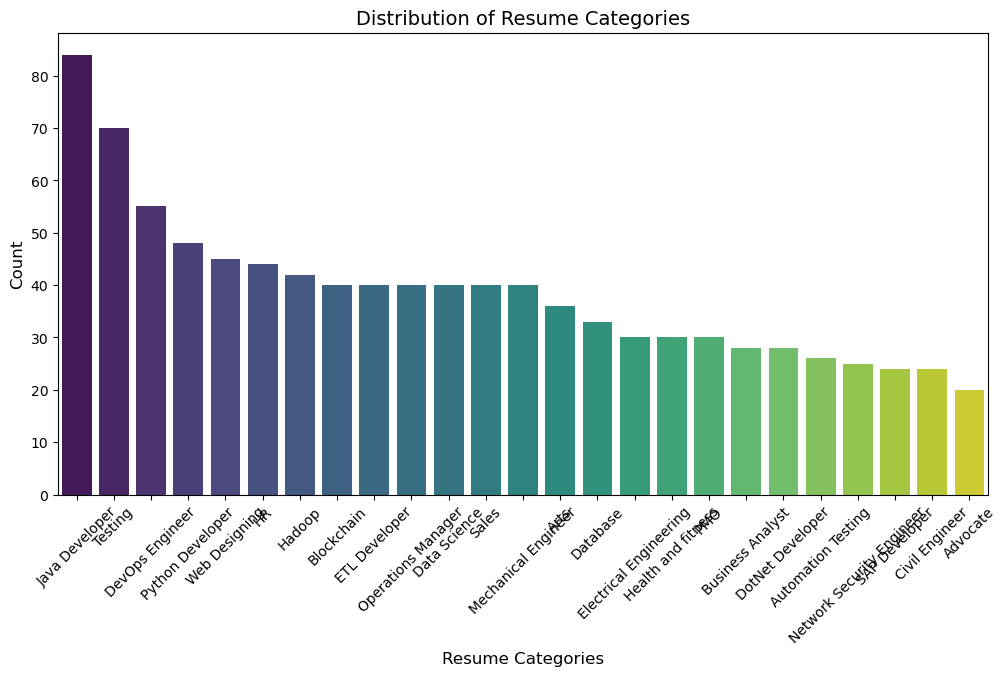

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each category
category_counts = r['Category'].value_counts()

# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')

# Add labels and title
plt.xlabel("Resume Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Resume Categories", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vishal
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [10]:
r['Category'].value_counts().max()

84

### Balancing the Categories:

In [11]:
# Check the original category distribution
print("="*50)
print("Original Category Distribution:")
print(r['Category'].value_counts())
print("="*50)

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = r['Category'].value_counts().max()
print("The resume that is having highest frequency = ",max_size)
print("="*50)

# Perform oversampling
balanced_r = r.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
r = balanced_r.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(r['Category'].value_counts())

Original Category Distribution:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64
The resume that is having highest frequency =  84

Balanced Category Distribution (After Oversampling):
Category
Business Analyst    

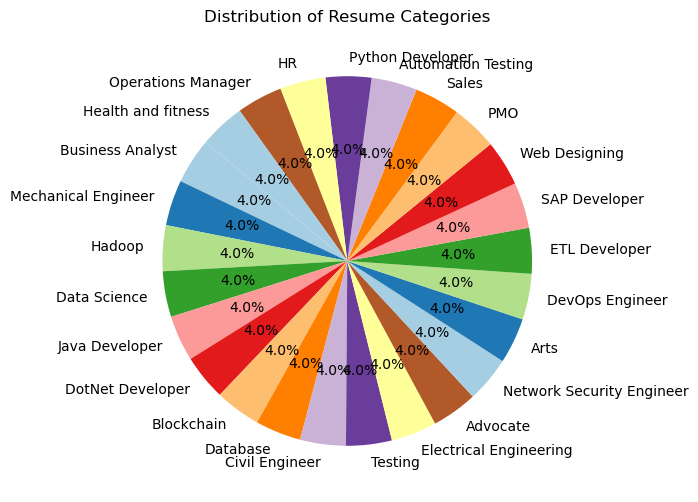

In [12]:
# Count occurrences of each category
category_counts = r['Category'].value_counts()

# Set figure size
plt.figure(figsize=(10, 6))

# Create pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title("Distribution of Resume Categories")

# Show the plot
plt.show()

In [13]:
r

,Category,Resume
0,Business Analyst,Key Skills - Requirement Gathering - Requireme...
1,Business Analyst,IT Skills: Area Exposure Modeling Tool: Bizagi...
2,Arts,â¢ Operating Systems: Windows XP / Vista / 07...
3,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...
4,HR,Education Details \r\n BA mumbai University\...
...,...,...
2095,Database,"TECHNICAL SKILLS â¢ SQL â¢ Oracle v10, v11, ..."
2096,Advocate,â¢ Hard working â¢ Quick learnerEducation De...
2097,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
2098,Sales,KEY SKILLS: â¢ Planning & Strategizing â¢ Pr...


### Data Cleaning:


In [14]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText.lower().strip()

In [15]:
r['Resume']=r['Resume'].apply(cleanResume)

In [16]:
r["Resume"][455]

'software skills languages c c java operating systems windows xp 7 ubuntu rdbms oracle sql database my sql postgresql markup scripting html javascript php css jquery angular js framework struts hibernate spring mvc web server tomcat and glassfish web services rest and soap training detail duration 4 months from united telecommunication limited jharnet project place ranchi jharkhand networking requirements elementary configuration of router and switch ip and mac addressing lease line osi layers routing protocols status network designer education details 2 high school diploma government women ranchi jharkhand the institution blockchain engineer blockchain engineer auxledger skill details java exprience 19 months css exprience 12 months html exprience 12 months javascript exprience 12 months c exprience 6 monthscompany details company auxledger description worked with on lots of product on blockchain bitcoin build wallet and explorer on bitcoin ethereum build wallet and explorer on ethere

In [17]:
### Words into Catigorical values:

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
r['Category']=le.fit_transform(r['Category'])

In [19]:
r

,Category,Resume
0,4,key skills requirement gathering requirement a...
1,4,it skills area exposure modeling tool bizagi m...
2,1,operating systems windows xp vista 07education...
3,18,it skills well versed with ms office and inter...
4,12,education details ba mumbai university hr skil...
...,...,...
2095,7,technical skills sql oracle v10 v11 v12 r prog...
2096,0,hard working quick learnereducation details ju...
2097,23,personal skills quick learner eagerness to lea...
2098,22,key skills planning strategizing presentation ...


In [20]:
r.Category.unique()

array([ 4,  1, 18, 12, 20,  2, 22, 19, 24, 21, 10,  8, 17, 16,  0, 11, 23,
        5,  7,  3,  9, 15,  6, 13, 14])

### Vectorization:

In [21]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=TfidfVectorizer()
X=cv.fit_transform(r.Resume.values).toarray()
X=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [22]:
X

,000,01,017,02,03,04,04th,05,050education,06th,...,zaggle,zambia,zd,zenoss,zensar,zero,zhypility,zone,zookeeper,zz
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017315,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013938,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2096,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2097,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2098,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034403,0.0,0.0


### Splitting:

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X, r.Category, test_size=0.25, random_state=13)

In [24]:
x_train.shape

(1575, 7566)

In [25]:
x_test.shape

(525, 7566)

### Model Building:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=log.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cls=classification_report(y_test,y_pred)
print(accuracy)
print(cls)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00        22
          17       1.00

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.multiclass import OneVsRestClassifier
knn = OneVsRestClassifier(KNeighborsClassifier())
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9905
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        16
           6       0.83      1.00      0.91        20
           7       1.00      1.00      1.00        27
           8       1.00      0.94      0.97        18
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        31
          15       1.00      0.81      0.89        21
          

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        21
        

In [31]:

dt = OneVsRestClassifier(DecisionTreeClassifier())
dt.fit(x_train, y_train)
y_pred_rf = dt.predict(x_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        18
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        21
        

### Dumping Models:

In [32]:
import pickle
pickle.dump(cv,open('tfidf.pkl','wb'))
pickle.dump(rf, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [33]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = cv.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = rf.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [34]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'

In [35]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)


'Network Security Engineer'

In [36]:
myresume="""
John Doe
Houston, TX |  johndoe@email.com |  (123) 456-7890 |  LinkedIn: linkedin.com/in/johndoe | GitHub: github.com/johndoe

Career Objective
Motivated and detail-oriented SAP Developer with a strong foundation in SAP ABAP, SAP Fiori, and SAP HANA. Recent graduate with hands-on experience in ERP development, database management, and business process optimization. Proficient in ABAP programming, SQL, and UI5 development with a passion for automating business workflows and enhancing enterprise solutions. Seeking an entry-level SAP Developer role to contribute technical skills and grow within a dynamic organization.

Education
Bachelor of Science in Computer Science / Information Technology
University of Texas at Austin | 2021 – 2025

Relevant Coursework:
✔️ Enterprise Resource Planning (ERP)
✔️ Database Management & SQL
✔️ Object-Oriented Programming (Java, Python)
✔️ Web Development (JavaScript, HTML, CSS)

Technical Skills
✔️ SAP ABAP (Advanced Business Application Programming)
✔️ SAP HANA & SAP Fiori
✔️ SAP UI5 & OData Services
✔️ SQL & Database Management (Oracle, MySQL)
✔️ Web Development (JavaScript, HTML, CSS)
✔️ Object-Oriented Programming (Java, Python)

Internships & Projects
SAP Developer Intern | XYZ Tech Solutions (Summer 2024)

Developed custom SAP ABAP reports for financial transactions.
Optimized SAP HANA database queries, reducing processing time by 20%.
Created SAP Fiori applications to enhance user experience for business operations."""
pred(myresume)

'SAP Developer'